![seaborn](../images/seaborn/seaborn_main.png)

## Seaborn이란?


- matplotlib을 기본으로 다양한 시각화 기법을 제공하는 라이브러리.


- 엄청나게 화려한 시각화 기법들을 제공하며, 기본적으로 이쁩니다.
>  histplot, kdeplot, jointplot, Facetgrid, ...


- pandas DataFrame과 매우 호환이 잘 됩니다.

  >  e.g. sns.xxxplot(data=df)    **<--- 기본세팅!**

In [1]:
# 라이브러리와 데이터를 불러오고, 시각화를 위한 세팅을 합니다.
import seaborn as sns
sns.set_theme(style='whitegrid')
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [2]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
penguins.dropna(inplace=True)


In [4]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


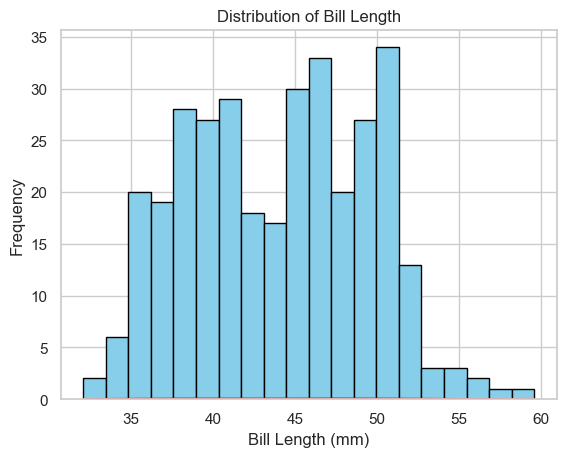

In [26]:
import matplotlib.pyplot as plt

# 히스토그램 그리기
plt.hist(penguins['bill_length_mm'], bins=20, color='skyblue', edgecolor='black')

# 그래프 꾸미기
plt.title("Distribution of Bill Length")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Frequency")

# 커널 밀도 추정(KDE) 추가
import numpy as np
from scipy.stats import gaussian_kde

# KDE 계산
kde = gaussian_kde(penguins['bill_length_mm'])
x = np.linspace(min(penguins['bill_length_mm']), max(penguins['bill_length_mm']), 1000)
plt.plot(x, kde(x), color='red')

# 그래프 표시
plt.show()


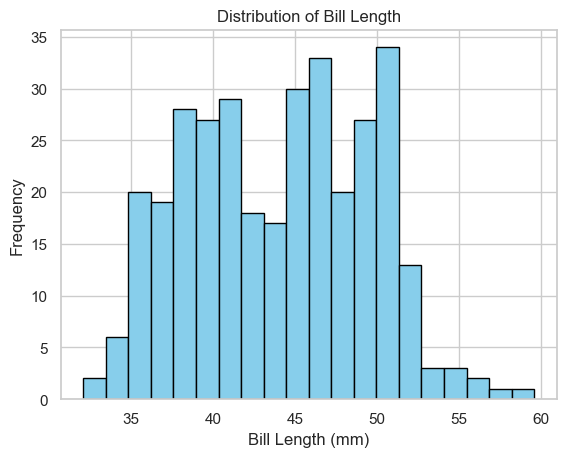

In [27]:
import pandas as pd

# Pandas를 사용하여 히스토그램 그리기
penguins['bill_length_mm'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')

# 그래프 꾸미기
plt.title("Distribution of Bill Length")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Frequency")

# 그래프 표시
plt.show()


### Histplot 

- 가장 기본적으로 사용되는 히스토그램을 출력하는 plot.


- 전체 데이터를 특정 구간별 정보를 확인할 때 사용합니다.

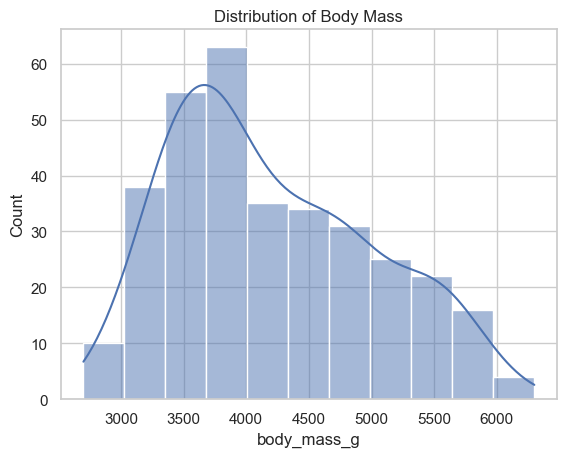

In [28]:
sns.histplot(penguins['body_mass_g'], kde=True)
plt.title("Distribution of Body Mass")
plt.show()

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

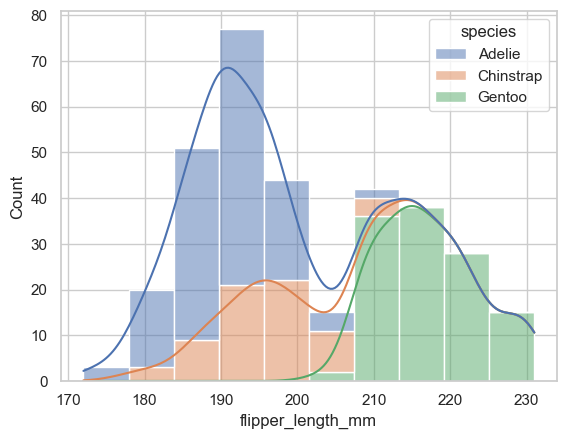

In [29]:
# penguin 데이터에 histplot을 출력합니다.
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple='stack', kde=True)

### Displot 

- distribution들을 여러 subplot들로 나눠서 출력해주는 plot.


- displot에 kind를 변경하는 것으로, histplot, kdeplot, ecdfplot 모두 출력이 가능합니다.

e.g. displot(kind="hist")

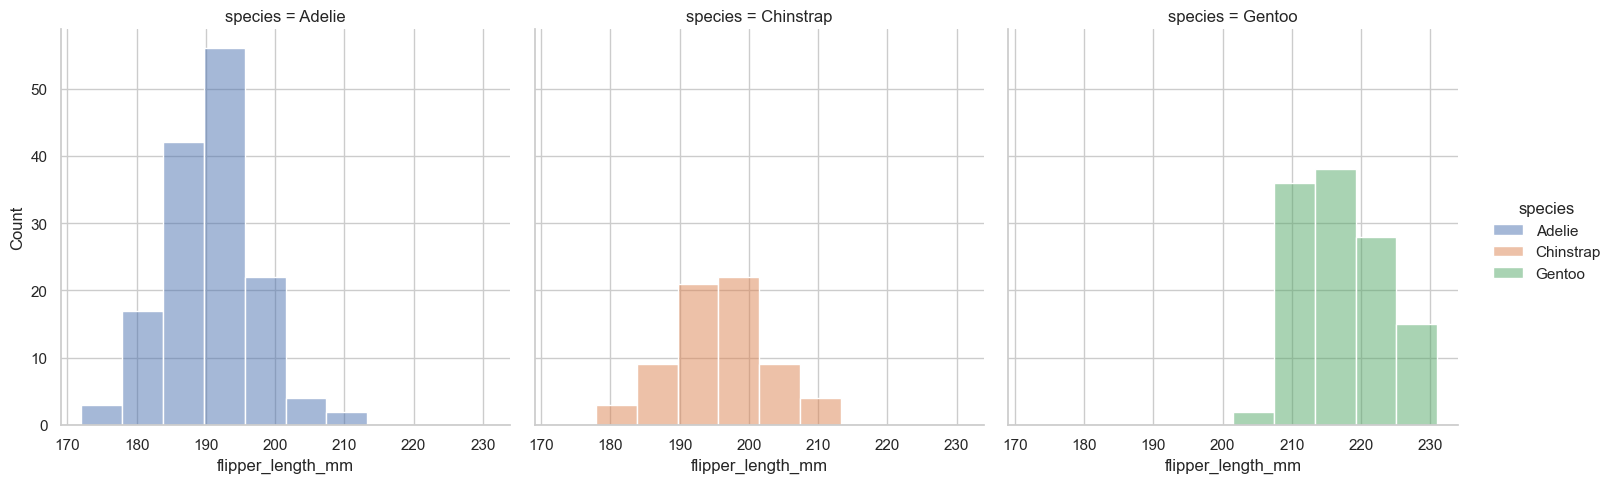

In [6]:
# penguin 데이터에 displot을 출력합니다.
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species")

### Barplot

- 어떤 데이터에 대한 값의 크기를 막대로 보여주는 plot. (a.k.a. 막대그래프)


- 가로 / 세로 두 가지로 모두 출력 가능합니다.


- 히스토그램과는 다릅니다!

<Axes: >

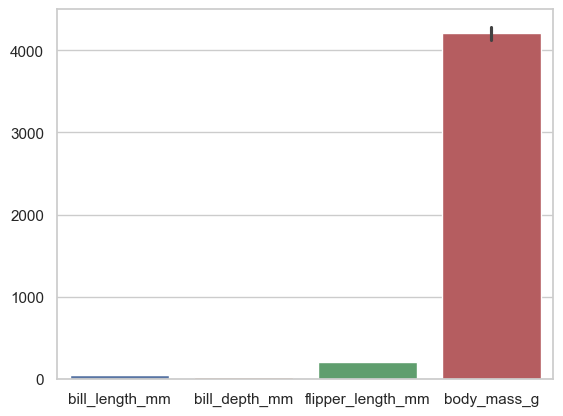

In [10]:
sns.barplot(data=penguins)

<Axes: xlabel='flipper_length_mm', ylabel='species'>

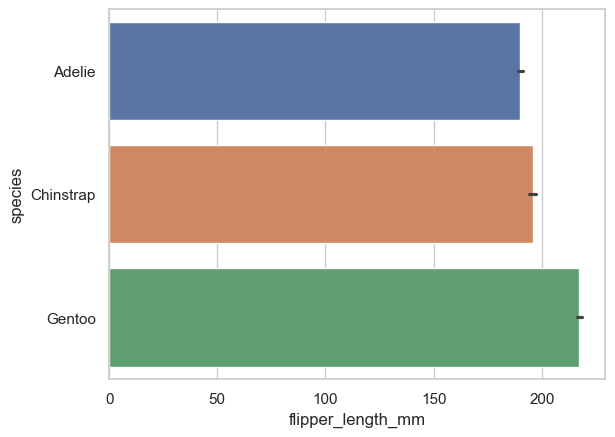

In [31]:
# penguin 데이터에 barplot을 출력합니다.
sns.barplot(data=penguins, x="flipper_length_mm", y="species", hue='species')


<Axes: xlabel='species', ylabel='flipper_length_mm'>

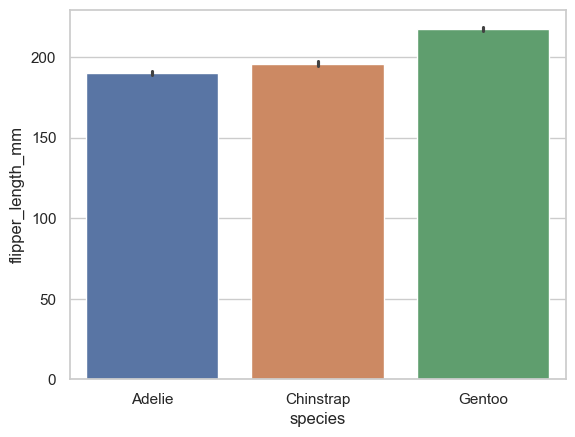

In [8]:

sns.barplot(data=penguins, y="flipper_length_mm", x="species", hue='species')


<Axes: xlabel='species', ylabel='body_mass_g'>

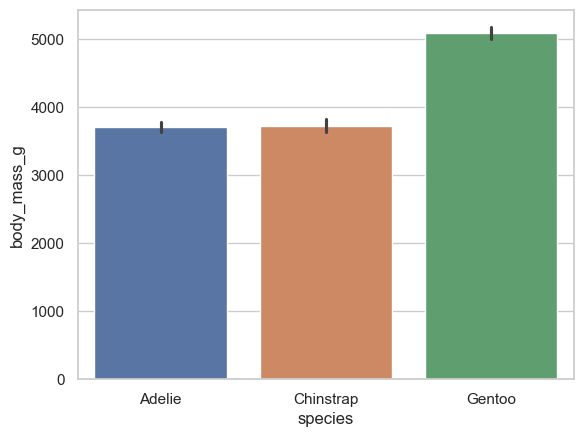

In [9]:

sns.barplot(data=penguins, y="body_mass_g", x="species", hue='species')

### Countplot

- 범주형 속성을 가지는 데이터들의 histogram을 보여주는 plot.



- 종류별 count를 보여주는 방법입니다.

<Axes: xlabel='species', ylabel='count'>

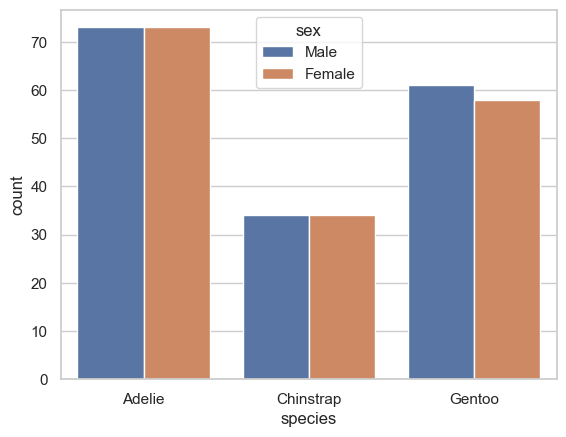

In [11]:
# penguin 데이터에 countplot을 출력합니다.
sns.countplot(data=penguins, x='species', hue='sex')

### Boxplot


- 데이터의 각 종류별로 사분위 수(quantile)를 표시하는 plot.


- 특정 데이터의 전체적인 분포를 확인하기 좋은 시각화 기법입니다.


- box와 전체 range의 그림을 통해 outlier를 찾기 쉽습니다. (IQR : Inter-Quantile Range)

<Axes: xlabel='flipper_length_mm', ylabel='species'>

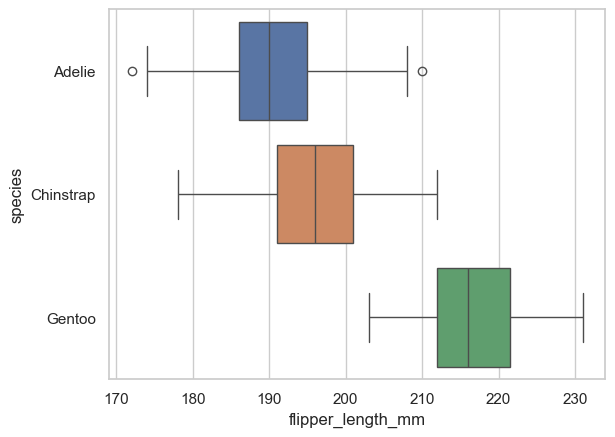

In [12]:
# penguin 데이터에 boxplot을 출력합니다.
sns.boxplot(data=penguins, x="flipper_length_mm", y="species", hue="species")


In [ ]:

#sns.boxplot(data=penguins, x="body_mass_g", y="species", hue="species")
#sns.boxplot(data=penguins, x="body_mass_g", y="species", hue="sex")
sns.boxplot(data=penguins, y="body_mass_g", x="species", hue="sex")

### Violinplot 

- 데이터에 대한 분포 자체를 보여주는 plot.


- boxplot과 비슷하지만, 전체 분포에 대한 그림을 보여준다는 점에서 boxplot과 다릅니다.


- 보통 boxplot과 함께 표시하면, 평균 근처에 데이터가 얼마나 있는지(boxplot) 전체적으로 어떻게 퍼져있는지(violinplot) 모두 확인이 가능합니다.

<Axes: >

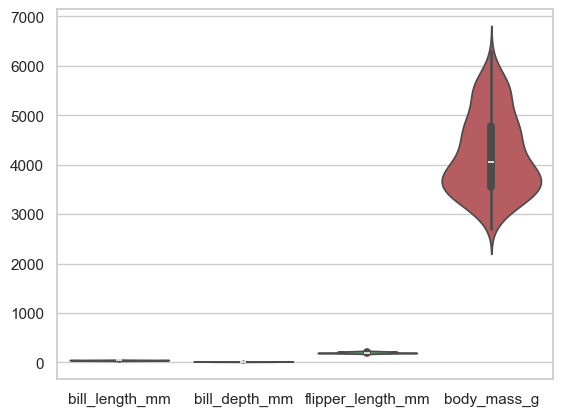

In [15]:
sns.violinplot(data=penguins)

<Axes: xlabel='species', ylabel='flipper_length_mm'>

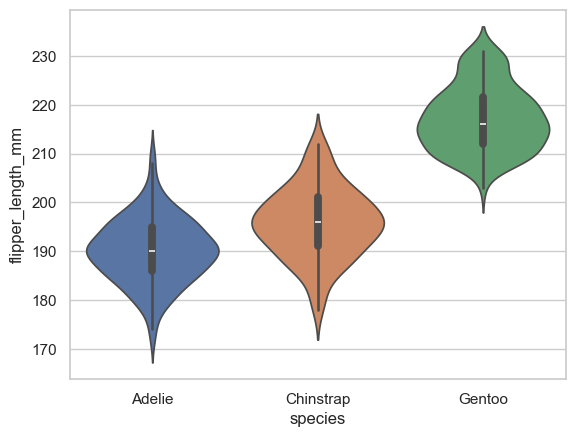

In [14]:
# penguin 데이터에 violinplot을 출력합니다.
sns.violinplot(data=penguins, y="flipper_length_mm", x="species", hue="species")


In [ ]:
sns.violinplot(data=penguins, y="body_mass_g", x="species", hue="sex")

### Lineplot

- 특정 데이터를 x, y로 표시하여 관계를 확인할 수 있는 plot. (선 그래프)


- 수치형 지표들 간의 경향을 파악할 때 많이 사용합니다.

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

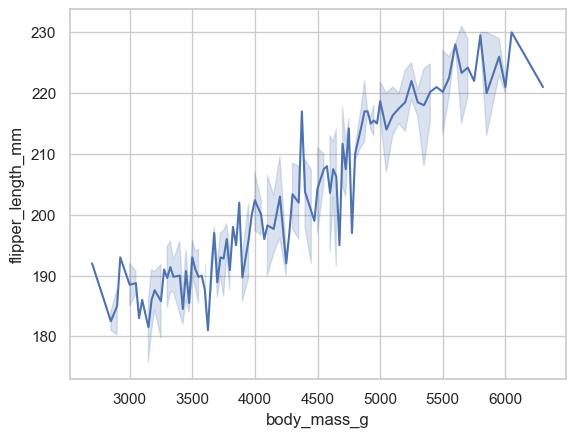

In [32]:
sns.lineplot(data=penguins, x="body_mass_g", y="flipper_length_mm")

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

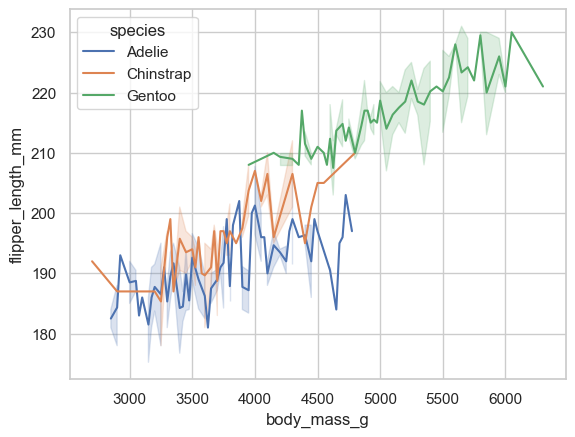

In [17]:
# penguin 데이터에 lineplot을 출력합니다.
sns.lineplot(data=penguins, x="body_mass_g", y="flipper_length_mm", hue="species")


<Axes: xlabel='bill_depth_mm', ylabel='bill_length_mm'>

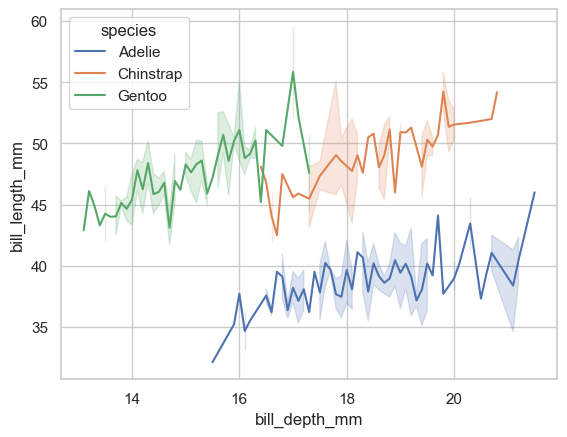

In [18]:

#sns.lineplot(data=penguins, y="body_mass_g", x="flipper_length_mm", hue="sex")
sns.lineplot(data=penguins, y="bill_length_mm", x="bill_depth_mm", hue="species")

### Pointplot

- 특정 수치 데이터를 error bar와 함께 출력해주는 plot.



- 수치 데이터를 다양한 각도에서 한 번에 바라보고 싶을 때 사용합니다.


- 데이터와 error bar를 한 번에 찍어주기 때문에, 살펴보고 싶은 특정 지표들만 사용하는 것이 좋습니다.

<Axes: xlabel='sex', ylabel='flipper_length_mm'>

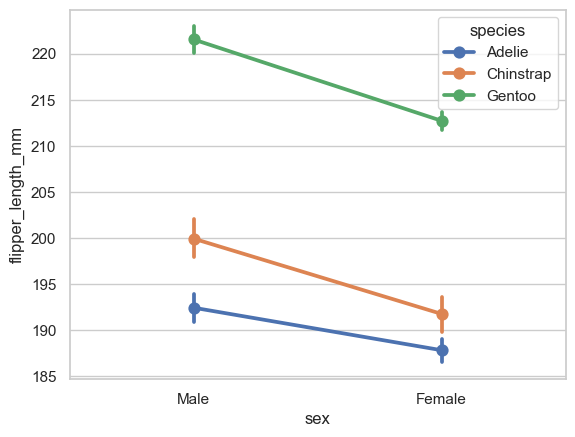

In [19]:
# penguin 데이터에 pointplot을 출력합니다.
sns.pointplot(data=penguins, y="flipper_length_mm", x="sex", hue="species")


<Axes: xlabel='sex', ylabel='bill_length_mm'>

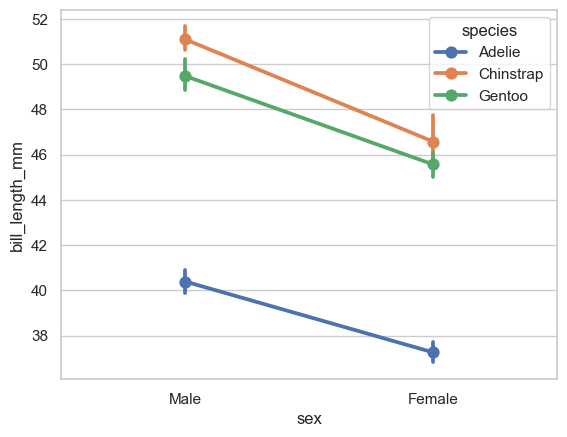

In [20]:

sns.pointplot(data=penguins, y="bill_length_mm", x="sex", hue="species")

### Scatterplot

- lineplot과 비슷하게 x, y에 대한 전체적인 분포를 확인하는 plot.


- lineplot은 경향성에 초점을 둔다면, scatterplot은 데이터 그 자체가 퍼져있는 모양에 중점을 둡니다.

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

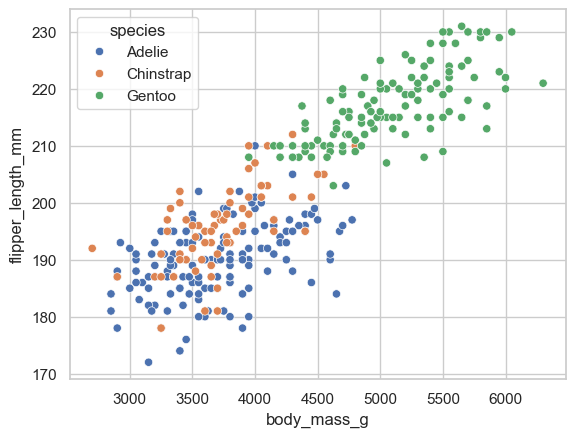

In [21]:
# penguin 데이터에 scatterplot을 출력합니다.
sns.scatterplot(data=penguins, x="body_mass_g", y="flipper_length_mm", hue="species")


<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

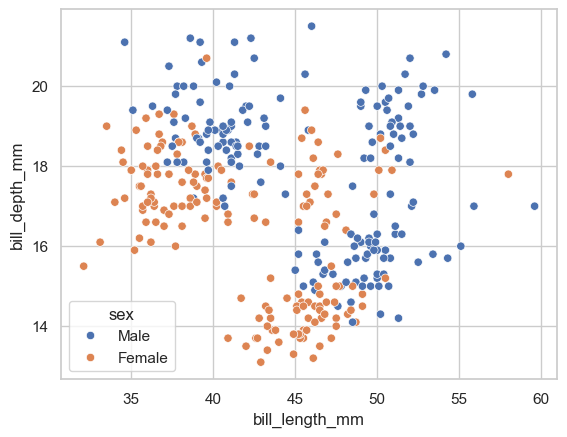

In [22]:

sns.scatterplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="sex")

### Pairplot


- 주어진 데이터의 각 feature들 사이의 관계를 표시하는 Plot.


- scatterplot, FacetGrid, kdeplot을 이용하여 feature간의 관계를 잘 보여줍니다.


- 각 feature에 대해 계산된 모든 결과를 보여주기 때문에, feature가 많은 경우 사용하기 적합하지 않습니다.

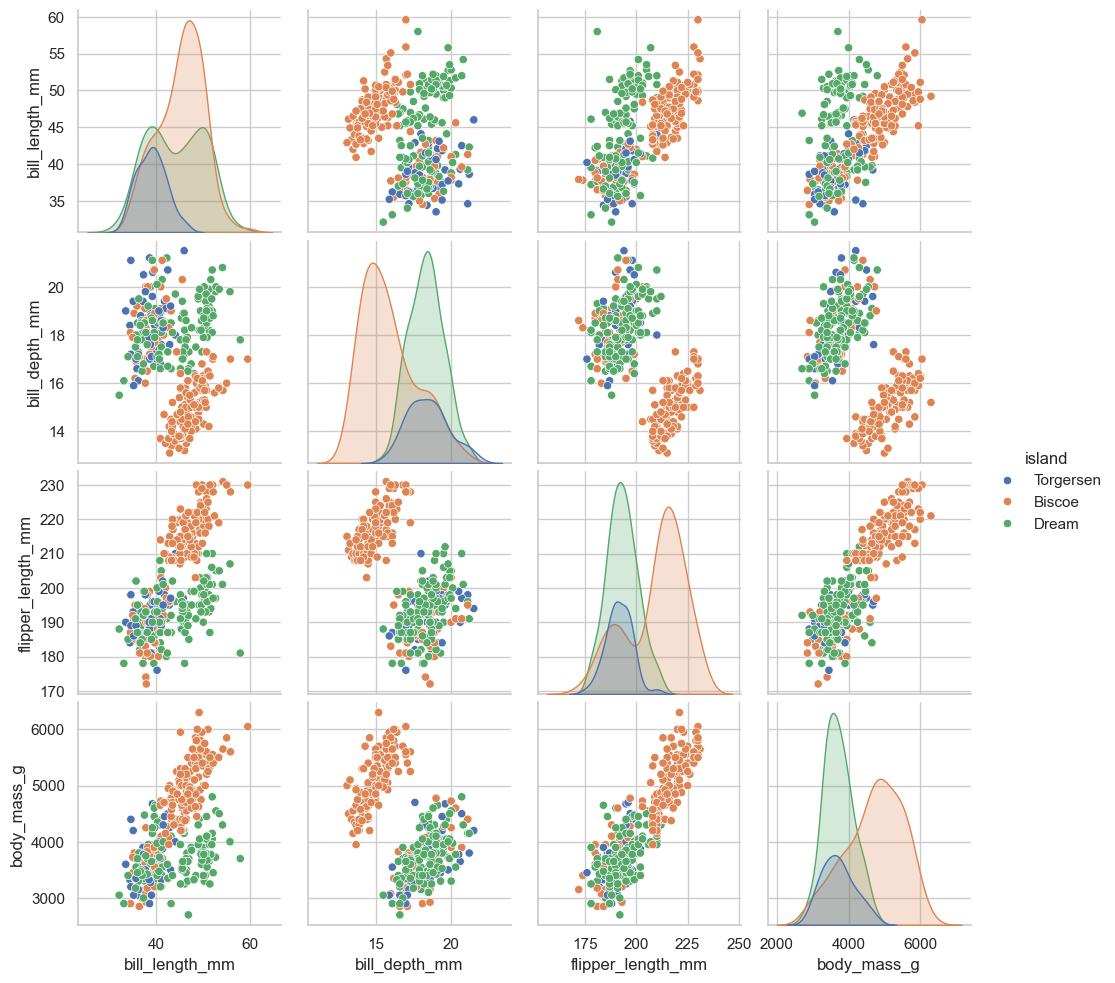

In [23]:
# penguin 데이터에 pairplot을 출력합니다.
sns.pairplot(data=penguins, hue="island")

### Heatmap

- 정사각형 그림에 데이터에 대한 정도 차이를 색 차이로 보여주는 plot.


- 말 그대로 heatmap이기 때문에, 열화상카메라로 사물을 찍은 것처럼 정보의 차이를 보여줍니다.


- pairplot과 비슷하게 feature간 관계를 시각화할 때 많이 사용합니다.

In [12]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [24]:
# 각 feature간 상관관계를 파악하기 위해 Correlation matrix를 만듭니다.
import numpy as np

# 필터링하여 숫자형 열만 선택
numeric_penguins = penguins.select_dtypes(include=[np.number])

# 각 feature간 상관관계를 파악하기 위해 Correlation matrix를 만듭니다.
corr = numeric_penguins.corr()

# 결과 출력
print(corr)


                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.228626           0.653096   
bill_depth_mm           -0.228626       1.000000          -0.577792   
flipper_length_mm        0.653096      -0.577792           1.000000   
body_mass_g              0.589451      -0.472016           0.872979   

                   body_mass_g  
bill_length_mm        0.589451  
bill_depth_mm        -0.472016  
flipper_length_mm     0.872979  
body_mass_g           1.000000  


### 상관계수의 값:
- +1: 완전한 양의 상관관계 (두 변수는 완전히 동일하게 변화)
- 0: 상관관계 없음 (두 변수 간에 관계가 없음)
- -1: 완전한 음의 상관관계 (한 변수가 증가하면 다른 변수는 완전히 반대로 변화)
### 상관계수 해석 예시:
### 상관계수 값	해석
- +1	두 변수는 완벽하게 양의 상관관계를 가짐
----------------------------------------------------------------
- 0.7 ~ 1	강한 양의 상관관계
- 0.3 ~ 0.7	중간 정도의 양의 상관관계
- 0 ~ 0.3	약한 양의 상관관계
----------------------------------------------------------------
- 0	상관관계 없음
----------------------------------------------------------------
- -0.3 ~ 0	약한 음의 상관관계
- -0.7 ~ -0.3	중간 정도의 음의 상관관계
- -1	두 변수는 완벽하게 음의 상관관계를 가짐

<Axes: >

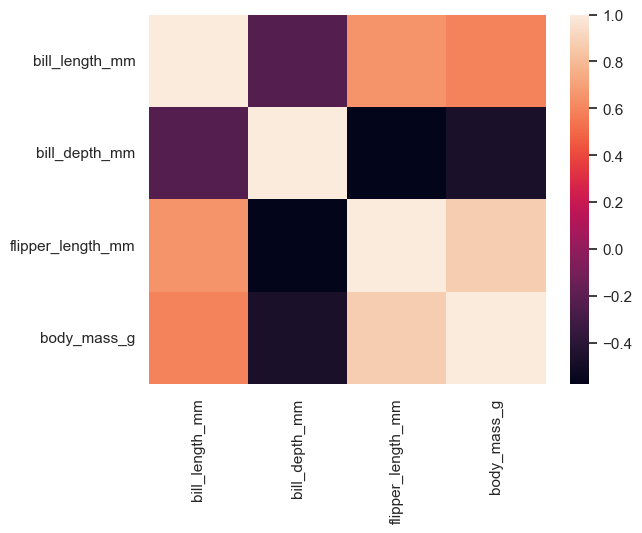

In [25]:
# penguin 데이터에 heatmap을 출력합니다.
sns.heatmap(corr)